## Credit Card Segmentation using K-Means (clustering)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
credit=pd.read_csv('N:/AnalytixLabs/Final Capstone/Extracted/4. Segmentation of Credit Card Customers/CC_GENERAL.csv')

In [3]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [5]:
credit.isna().any().sum()
#means in two columns

2

In [6]:
credit.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [7]:
credit['CREDIT_LIMIT'].isna().sum()

1

In [8]:
credit['MINIMUM_PAYMENTS'].isna().sum()

313

In [9]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [10]:
credit.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
credit_conti=credit.select_dtypes(include=['float64','int64'])
credit_categ=credit.select_dtypes(include=['object'])

In [12]:
credit_conti.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
credit_categ.head()

,CUST_ID
0,C10001
1,C10002
2,C10003
3,C10004
4,C10005


### Outlier Treatment

In [14]:
credit_conti=credit_conti.apply(lambda x: x.clip(lower=x.quantile(0.01),
                                                upper=x.quantile(0.99)))

In [15]:
credit_conti.describe(percentiles=[0.1,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,10%,50%,75%,90%,95%,99%,max
BALANCE,8950.0,1541.046707,1966.597484,0.065101,23.575529,873.385231,2054.140036,4338.563657,5909.111808,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.878083,0.234032,0.090909,0.454545,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,936.229237,1525.185179,0.000000,0.000000,361.280000,1110.130000,2542.624000,3998.619500,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,536.493774,1096.913512,0.000000,0.000000,38.000000,577.405000,1600.099000,2671.094000,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,384.498368,676.271068,0.000000,0.000000,89.000000,468.637500,1140.070000,1750.087500,3885.853155,3886.240500
CASH_ADVANCE,8950.0,935.920972,1775.774147,0.000000,0.000000,0.000000,1113.821139,3065.534560,4647.169122,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.000000,0.500000,0.916667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,0.750000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.134017,0.195550,0.000000,0.000000,0.000000,0.222222,0.416667,0.583333,0.833333,0.833333


### Missing Values

In [16]:
credit.isna().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [17]:
credit_conti.CREDIT_LIMIT.fillna(credit_conti.CREDIT_LIMIT.mean(),inplace=True)

In [18]:
credit_conti.MINIMUM_PAYMENTS.fillna(credit_conti.MINIMUM_PAYMENTS.mean(),inplace=True)

In [19]:
credit_conti.isna().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

#### Missing values imputed

------------------------------------

### Concatenating conti and categ df

In [22]:
credit_new=pd.concat([credit_categ,credit_conti],axis=1)

In [23]:
credit_new

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,767.303879,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,275.861322,767.303879,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5.0,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0.0,500.0,52.549959,55.755628,0.250000,6


## Deriving New KPI's for meaningful Variables and Insights

#### 1.Monthly average purchase 

In [24]:
credit_new['Monthly_average_purchase']=credit['PURCHASES']/credit.TENURE

In [25]:
credit_new['Monthly_average_purchase']

0         7.950000
1         0.000000
2        64.430833
3       124.916667
4         1.333333
           ...    
8945     48.520000
8946     50.000000
8947     24.066667
8948      0.000000
8949    182.208333
Name: Monthly_average_purchase, Length: 8950, dtype: float64

In [26]:
credit_new

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,767.303879,0.000000,12,124.916667
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,325.594462,48.886365,0.500000,6,48.520000
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6.0,1000.0,275.861322,767.303879,0.000000,6,50.000000
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5.0,1000.0,81.270775,82.418369,0.250000,6,24.066667
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0.0,500.0,52.549959,55.755628,0.250000,6,0.000000


### 2. Monthly cash advance amount 

In [27]:
credit_new['Monthly_cash_advance']=credit['CASH_ADVANCE']/credit.TENURE

In [28]:
credit_new.Monthly_cash_advance

0         0.000000
1       536.912124
2         0.000000
3        17.149001
4         0.000000
           ...    
8945      0.000000
8946      0.000000
8947      0.000000
8948      6.093130
8949     21.173335
Name: Monthly_cash_advance, Length: 8950, dtype: float64

In [29]:
credit_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,767.303879,0.000000,12,124.916667,17.149001
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000


### 3.Purchases by type (one-off, installments) 

In [30]:
credit_new[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']]

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.40
1,0.00,0.00
2,773.17,0.00
3,1499.00,0.00
4,16.00,0.00
...,...,...
8945,0.00,291.12
8946,0.00,300.00
8947,0.00,144.40
8948,0.00,0.00


In [31]:
credit_new[(credit_new['ONEOFF_PURCHASES']==0) & (credit_new['INSTALLMENTS_PURCHASES']==0)].shape
                                                  
#means none

(2042, 20)

In [32]:
credit_new[(credit_new['ONEOFF_PURCHASES']>0) & (credit_new['INSTALLMENTS_PURCHASES']==0)].shape
                                                  
#means only oneoff purchases

(1874, 20)

In [33]:
credit_new[(credit_new['ONEOFF_PURCHASES']==0) & (credit_new['INSTALLMENTS_PURCHASES']>0)].shape
                                                  
#means only installment purchases

(2260, 20)

In [34]:
credit_new[(credit_new['ONEOFF_PURCHASES']>0) & (credit_new['INSTALLMENTS_PURCHASES']>0)].shape
                                                  
#means both

(2774, 20)

##### So, there are 4 types of purchases

In [35]:
def purchase_type(credit_new):
    if (credit_new.ONEOFF_PURCHASES==0) &  (credit_new.INSTALLMENTS_PURCHASES==0):
        return 'no purchase'
    elif (credit_new.ONEOFF_PURCHASES>0) &  (credit_new.INSTALLMENTS_PURCHASES==0):
        return 'oneoff_purchase'
    elif (credit_new.ONEOFF_PURCHASES==0) &  (credit_new.INSTALLMENTS_PURCHASES>0):
        return 'installment'
    elif (credit_new.ONEOFF_PURCHASES>0) &  (credit_new.INSTALLMENTS_PURCHASES>0):
        return 'both purchases'

In [36]:
credit_new['purchase_type']=credit_new.apply(purchase_type,axis=1)

In [37]:
credit_new.purchase_type.value_counts()

both purchases     2774
installment        2260
no purchase        2042
oneoff_purchase    1874
Name: purchase_type, dtype: int64

In [38]:
credit_new.shape

(8950, 21)

In [39]:
credit_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,no purchase
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff_purchase
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1.0,7500.0,0.000000,767.303879,0.000000,12,124.916667,17.149001,oneoff_purchase
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff_purchase


#### 4.Limit usage (balance to credit limit ratio)

In [40]:
credit_new['limit_usage']=credit_new.BALANCE/credit_new.CREDIT_LIMIT

In [41]:
credit_new.limit_usage


#lower the value means customers are maintaining proper Balance, and means better the good credit score

0       0.040901
1       0.457495
2       0.332687
3       0.222223
4       0.681429
          ...   
8945    0.028494
8946    0.019183
8947    0.023399
8948    0.026915
8949    0.310590
Name: limit_usage, Length: 8950, dtype: float64

In [42]:
   credit_new.head() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,purchase_type,limit_usage
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2.0,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,no purchase,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12.0,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff_purchase,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1.0,7500.0,0.000000,767.303879,0.000000,12,124.916667,17.149001,oneoff_purchase,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1.0,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff_purchase,0.681429


#### 5 .Payments to minimum payments ratio 

In [43]:
credit_new['payment_minpay_ratio']=credit_new.PAYMENTS/credit_new.MINIMUM_PAYMENTS

In [44]:
credit_new['payment_minpay_ratio']

0       1.446508
1       3.826241
2       0.991682
3       0.000000
4       2.771075
          ...   
8945    6.660231
8946    0.359520
8947    0.986076
8948    0.942505
8949    0.715439
Name: payment_minpay_ratio, Length: 8950, dtype: float64

### Extreme Value Treatment
- Doing log-transformation on the dataset bcz many variables have extreme values.

In [45]:
credit_new.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_average_purchase', 'Monthly_cash_advance', 'purchase_type',
       'limit_usage', 'payment_minpay_ratio'],
      dtype='object')

In [46]:
# log tranformation
credit_log=credit_new.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

In [47]:
credit_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,purchase_type,limit_usage,payment_minpay_ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,no purchase,0.457495,3.826241
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff_purchase,0.332687,0.991682
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,7500.0,0.000000,767.303879,0.000000,12,124.916667,17.149001,oneoff_purchase,0.222223,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff_purchase,0.681429,2.771075


In [48]:
credit_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,...,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949,2.191654,0.000000,0.040086,0.894662
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,...,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949,0.000000,6.287695,0.376719,1.574068
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,...,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,...,0.693147,8.922792,0.000000,6.644185,0.000000,2.564949,4.835620,2.898616,0.200671,0.000000
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,...,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949,0.847298,0.000000,0.519644,1.327360


In [49]:
credit_new.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1541.046707,0.878083,936.229237,536.493774,384.498368,935.920972,0.490351,0.202458,0.364437,0.134017,...,14.151385,4474.419279,1649.420364,767.303879,0.153715,11.517318,86.175173,88.977984,0.385243,5.517874
std,1966.597484,0.234032,1525.185179,1096.913512,676.271068,1775.774147,0.401371,0.298336,0.397448,0.195550,...,20.962159,3551.065546,2251.668769,1255.866493,0.292499,1.338331,180.508787,193.136115,0.351502,15.170837
min,0.065101,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,500.000000,0.000000,19.524478,0.000000,6.000000,0.000000,0.000000,0.000007,0.000000
10%,23.575529,0.454545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1200.000000,179.617069,109.131328,0.000000,10.000000,0.000000,0.000000,0.007789,0.528805
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,3.399375,0.000000,0.041450,0.908688
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,...,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,31.936667,0.000000,0.301987,2.013115
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,...,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000,97.228333,99.085196,0.708236,6.006650
90%,4338.563657,1.000000,2542.624000,1600.099000,1140.070000,3065.534560,1.000000,0.750000,1.000000,0.416667,...,37.000000,9500.000000,3923.906642,1731.689977,0.670000,12.000000,217.353917,278.058470,0.918268,12.812527
95%,5909.111808,1.000000,3998.619500,2671.094000,1750.087500,4647.169122,1.000000,1.000000,1.000000,0.583333,...,57.000000,12000.000000,6082.090595,2719.566935,1.000000,12.000000,339.250042,425.548562,0.965423,20.430285


In [50]:
credit_log.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.99])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.160169,0.620717,4.895139,3.199459,3.348077,3.315944,0.361268,0.158699,0.270072,0.112929,...,1.891305,8.095961,6.620286,5.948975,0.117730,2.519680,3.050877,2.163970,0.294688,1.342348
std,2.008137,0.145539,2.909699,3.237351,3.075512,3.560867,0.277317,0.216672,0.281852,0.154677,...,1.365930,0.811006,1.583113,1.134964,0.211617,0.130367,2.002823,2.429741,0.247833,0.903203
min,0.063069,0.087011,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.216606,0.000000,3.021618,0.000000,1.945910,0.000000,0.000000,0.000007,0.000000
10%,3.201751,0.374693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.090910,5.196379,4.701673,0.000000,2.397895,0.000000,0.000000,0.007758,0.424487
25%,4.861995,0.635989,3.704627,0.000000,0.000000,0.000000,0.080042,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951361,5.146667,0.000000,2.564949,1.481458,0.000000,0.040614,0.646416
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.080042,0.154151,0.000000,...,2.079442,8.006701,6.754489,5.818979,0.000000,2.564949,3.494587,0.000000,0.263891,1.102974
75%,7.628099,0.693147,7.013133,6.360274,6.151961,7.016449,0.650588,0.262364,0.559616,0.200671,...,2.890372,8.779711,7.550732,6.671670,0.133531,2.564949,4.587295,4.606022,0.535461,1.946860
90%,8.375529,0.693147,7.841345,7.378446,7.039722,8.028303,0.693147,0.559616,0.693147,0.348307,...,3.637586,9.159152,8.275098,7.457430,0.512806,2.564949,5.386117,5.631421,0.651423,2.625576
95%,8.684420,0.693147,8.293954,7.890616,7.467991,8.444227,0.693147,0.693147,0.693147,0.459532,...,4.060443,9.392745,8.713268,7.908595,0.693147,2.564949,5.829680,6.055726,0.675708,3.064805


### Removing those columns from which we have already found new KPI's and meaningful Insights

In [51]:
col=['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT','TENURE']
credit_updated=credit_log[[x for x in credit_log.columns if x not in col]]

In [52]:
credit_updated.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360


In [53]:
credit_updated.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay_ratio'],
      dtype='object')

In [54]:
credit_log.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_average_purchase', 'Monthly_cash_advance',
       'limit_usage', 'payment_minpay_ratio'],
      dtype='object')

### Getting Insights

#### 1.Average amount per purchase

In [55]:
credit_new.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_average_purchase', 'Monthly_cash_advance', 'purchase_type',
       'limit_usage', 'payment_minpay_ratio'],
      dtype='object')

In [56]:
credit_new.purchase_type.value_counts()

both purchases     2774
installment        2260
no purchase        2042
oneoff_purchase    1874
Name: purchase_type, dtype: int64

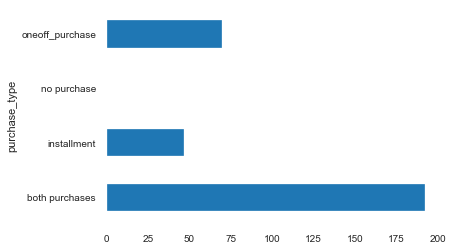

In [57]:
credit_new.groupby('purchase_type')['Monthly_average_purchase'].mean().plot.barh()

#### --> People spent more amount on both type of purchases (i.e oneoff and installment purchases)

#### 2.Average amount per cash advance transaction

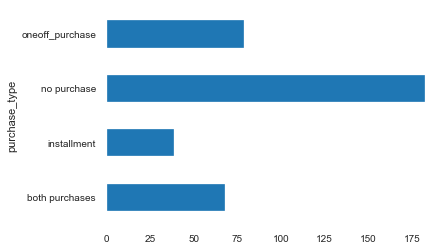

In [58]:
credit_new.groupby('purchase_type')['Monthly_cash_advance'].mean().plot.barh()

##### --> this means, people who dont purchase anything, tend to have more cash advance 

In [59]:
credit_new.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_average_purchase', 'Monthly_cash_advance', 'purchase_type',
       'limit_usage', 'payment_minpay_ratio'],
      dtype='object')

#### 3. Average Min_payment ratio for each purchase type

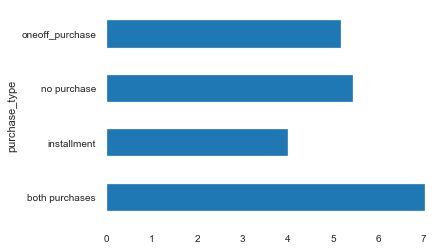

In [60]:
credit_new.groupby('purchase_type')['payment_minpay_ratio'].mean().plot.barh()

#### --> customers with both kind of purchases are paying the dues

#### 4. Average Limit usage(credit score) per purchase type

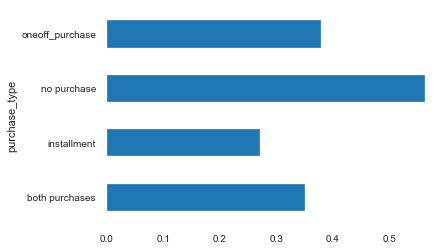

In [61]:
credit_new.groupby('purchase_type')['limit_usage'].mean().plot.barh()

#### --> customer with installments have low limit_usage value MEANS they have good credit score i.e implies cutomers are maintaing their balance properly and less the value of limit usage, more good credit score is

In [62]:
credit_updated.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay_ratio'],
      dtype='object')

### Now creating dummies on 'Purchase_type' column


In [63]:
credit_updated['purchase_type']=credit_new.loc[:,'purchase_type']
col_dummies=pd.get_dummies(credit_updated.purchase_type,prefix='purchase_type')#,drop_first=True)
credit_dummy=pd.concat([credit_updated,col_dummies],axis=1)
credit_dummy.drop(columns='purchase_type',inplace=True)

C:\Users\Himanshu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
credit_dummy.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay_ratio',
       'purchase_type_both purchases', 'purchase_type_installment',
       'purchase_type_no purchase', 'purchase_type_oneoff_purchase'],
      dtype='object')

In [65]:
credit_dummy.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,purchase_type_both purchases,purchase_type_installment,purchase_type_no purchase,purchase_type_oneoff_purchase
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1


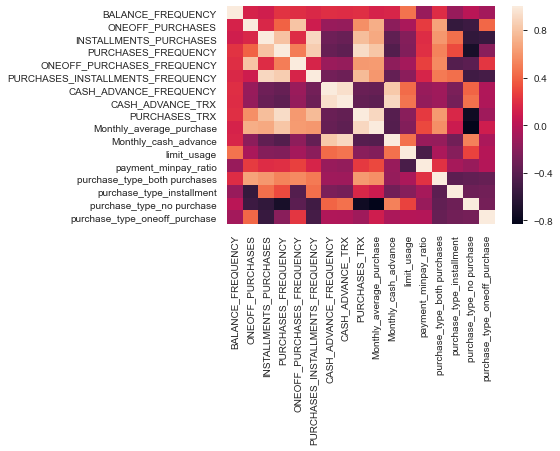

In [66]:
sns.heatmap(credit_dummy.corr())

#### Heat map shows that many features are co-related so applying dimensionality reduction will help negating multi-colinearity in data
- Before applying PCA we will standardize data to avoid effect of scale on our result. Centering and Scaling will make all features with equal weight.

### Scaling the Data

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
ss=StandardScaler()

In [69]:
credit_scaled=ss.fit_transform(credit_dummy)

In [70]:
credit_scaled

array([[-0.1572201 , -0.9883508 ,  0.39684378, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [ 0.17803665, -0.9883508 , -1.08868508, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [ 0.49769432,  1.06646613, -1.08868508, ..., -0.58122082,
        -0.54369045,  1.94316249],
       ...,
       [-0.10019758, -0.9883508 ,  0.53048181, ...,  1.72051649,
        -0.54369045, -0.514625  ],
       [-0.10019758, -0.9883508 , -1.08868508, ..., -0.58122082,
         1.83928189, -0.514625  ],
       [-0.75511006,  1.1733598 , -1.08868508, ..., -0.58122082,
        -0.54369045,  1.94316249]])

In [71]:
pd.DataFrame(credit_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.157220,-0.988351,0.396844,-0.746901,-0.732480,-0.674253,-0.730135,-0.815244,-0.580364,-0.429030,-0.890667,-1.027366,-0.495693,-0.670193,1.720516,-0.543690,-0.514625
1,0.178037,-0.988351,-1.088685,-1.302799,-0.732480,-0.958256,0.712589,0.797080,-1.384705,-1.523373,1.697282,0.331014,0.256568,-0.670193,-0.581221,1.839282,-0.514625
2,0.497694,1.066466,-1.088685,1.196820,2.466762,-0.958256,-0.730135,-0.815244,0.493204,0.564294,-0.890667,-0.030227,-0.723431,-0.670193,-0.581221,-0.543690,1.943162
3,-0.881194,1.270789,-1.088685,-1.014151,-0.363042,-0.958256,-0.212624,-0.120854,-0.877223,0.891164,0.302372,-0.379375,-1.486291,-0.670193,-0.581221,-0.543690,1.943162
4,0.497694,-0.113138,-1.088685,-1.014151,-0.363042,-0.958256,-0.730135,-0.815244,-0.877223,-1.100298,-0.890667,0.907742,-0.016595,-0.670193,-0.581221,-0.543690,1.943162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.497694,-0.988351,0.757343,1.196820,-0.732480,1.192408,-0.730135,-0.815244,0.039979,0.425174,-0.890667,-1.075754,0.768080,-0.670193,1.720516,-0.543690,-0.514625
8946,0.497694,-0.988351,0.767081,1.196820,-0.732480,1.192408,-0.730135,-0.815244,0.039979,0.439878,-0.890667,-1.112448,-1.146225,-0.670193,1.720516,-0.543690,-0.514625
8947,-0.100198,-0.988351,0.530482,0.883040,-0.732480,0.854234,-0.730135,-0.815244,-0.072881,0.085216,-0.890667,-1.095792,-0.726552,-0.670193,1.720516,-0.543690,-0.514625
8948,-0.100198,-0.988351,-1.088685,-1.302799,-0.732480,-0.958256,0.266521,0.285339,-1.384705,-1.523373,-0.084311,-1.081951,-0.751113,-0.670193,-0.581221,1.839282,-0.514625


##### Now, we have got scaled data, on top of this , we can apply PCA(Principal Component Analysis)

In [72]:
from sklearn.decomposition import PCA

In [73]:
variable_ratio={}
for i in range(1,17):
    pc=PCA(n_components=i)
    credit_pca=pc.fit(credit_scaled)
    variable_ratio[i]=sum(credit_pca.explained_variance_ratio_)

In [74]:
variable_ratio

{1: 0.4030161235227751,
 2: 0.583773605356501,
 3: 0.7313920214444711,
 4: 0.8128904390737588,
 5: 0.8780646851848605,
 6: 0.9201469689454923,
 7: 0.9423282910566368,
 8: 0.9622937578664394,
 9: 0.9746283326662513,
 10: 0.9839747159950331,
 11: 0.9900098451028333,
 12: 0.9929150409323838,
 13: 0.9955381159389806,
 14: 0.9979887694983477,
 15: 0.9996301125923381,
 16: 1.0}

#### Now we can see that 6 PCs' are able to capture 90% of the information. So we will deal with first 6 PCs only

In [75]:
pc_final=PCA(n_components=6).fit(credit_scaled)

In [76]:
pc_final

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

##### Eigen value of all 6 PCs

In [77]:
pc_final.explained_variance_ratio_


array([0.40301612, 0.18075748, 0.14761842, 0.08149842, 0.06517425,
       0.04208228])

In [78]:
sum(pc_final.explained_variance_ratio_)  ## more than 90% of the information captured by first 6 PCs

0.920146968945491

In [79]:
reduced_credit=pc_final.fit_transform(credit_scaled)

In [80]:
reduced_credit

array([[-2.39383531e-01, -2.77155830e+00,  3.57096072e-01,
        -3.84533400e-01, -3.24889489e-03,  5.03034017e-03],
       [-3.97847140e+00,  1.59826317e-01, -5.42764372e-01,
         1.05590207e+00, -3.97316930e-01, -5.90865060e-01],
       [ 1.28896565e+00,  1.50329388e+00,  2.69809856e+00,
        -1.92192934e+00, -3.46852815e-02, -5.90498150e-01],
       ...,
       [ 1.15727762e+00, -2.81522370e+00, -5.25673032e-01,
        -6.61401142e-01,  3.24708462e-01, -1.18583950e-04],
       [-3.25594960e+00, -1.01802160e+00,  4.80993526e-01,
         8.57920290e-01, -1.09436095e+00, -3.60135799e-02],
       [ 2.27609013e-01,  2.22157155e+00,  1.82889230e+00,
        -1.16349655e+00,  1.73599053e+00,  8.10624846e-01]])

In [81]:
pd.DataFrame(reduced_credit)

,0,1,2,3,4,5
0,-0.239384,-2.771558,0.357096,-0.384533,-0.003249,0.005030
1,-3.978471,0.159826,-0.542764,1.055902,-0.397317,-0.590865
2,1.288966,1.503294,2.698099,-1.921929,-0.034685,-0.590498
3,-1.059900,0.658406,2.503514,-1.341194,0.744742,1.436802
4,-1.446126,-0.173204,2.283464,-1.618501,-0.606158,-0.704691
...,...,...,...,...,...,...
8945,1.794047,-2.614416,-0.725498,-0.034444,0.629811,-1.260019
8946,1.570632,-2.685118,-0.978892,-1.138156,0.220723,-0.163960
8947,1.157278,-2.815224,-0.525673,-0.661401,0.324708,-0.000119
8948,-3.255950,-1.018022,0.480994,0.857920,-1.094361,-0.036014


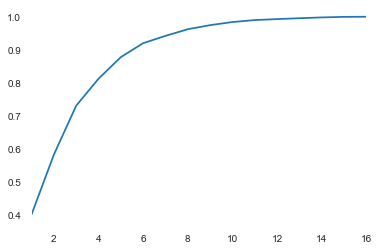

In [82]:
pd.Series(variable_ratio).plot()

#### in above graph, we can visualize the same that  90% of information is captured by first 6 PCs

In [83]:
columns_list=credit_dummy.columns
columns_list

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay_ratio',
       'purchase_type_both purchases', 'purchase_type_installment',
       'purchase_type_no purchase', 'purchase_type_oneoff_purchase'],
      dtype='object')

#### Eigen vectors of all 6 PCs

In [84]:
pd.DataFrame(pc_final.components_.T,columns=['PC_' + str(i) for i in range(6)],index=columns_list)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5
BALANCE_FREQUENCY,0.030756,0.238356,-0.266820,-0.346081,-0.234759,-0.692582
ONEOFF_PURCHASES,0.213617,0.406441,0.237877,-0.002971,-0.023928,0.132344
INSTALLMENTS_PURCHASES,0.311479,-0.099533,-0.315357,0.089168,0.000453,0.116447
PURCHASES_FREQUENCY,0.345383,0.015542,-0.163563,-0.077601,0.114192,-0.079881
ONEOFF_PURCHASES_FREQUENCY,0.214464,0.362437,0.161649,0.033650,-0.051788,-0.093349
PURCHASES_INSTALLMENTS_FREQUENCY,0.294913,-0.112437,-0.329905,0.023100,0.026225,0.008807
CASH_ADVANCE_FREQUENCY,-0.215160,0.286010,-0.278824,0.090118,0.360966,0.065535
CASH_ADVANCE_TRX,-0.230418,0.291375,-0.284747,0.095328,0.333286,0.083313
PURCHASES_TRX,0.355490,0.105381,-0.103433,-0.058609,0.104426,-0.006184
Monthly_average_purchase,0.345499,0.141416,0.023293,-0.083602,0.192851,0.016109


#### insight from above: Not much of interpretation can be derived from this eigen vectors
    In PC0, it mostly talk about the Variable 'PURCHASES_TRX' because it has highest weight of 0.355490 in entire PC0

### Factor Analysis : variance explained by each component- 


In [85]:
pd.DataFrame(pc_final.explained_variance_ratio_,index=['PC_'+ str(i) for i in range(6)])

,0
PC_0,0.403016
PC_1,0.180757
PC_2,0.147618
PC_3,0.081498
PC_4,0.065174
PC_5,0.042082


In [86]:
sum(pc_final.explained_variance_ratio_)

0.9201469689454912

### Clustering

In [87]:
from sklearn.cluster import KMeans

In [88]:
KMeans?

### now, we don't know how many clusters we want to make, and that should be interpretable and should follow business logic
- so we will use Measures such as cluster error and Silhouette score

#### Cluster Error

In [89]:
cluster_range= range(1,15)
cluster_error=[]
for i in cluster_range:
    clusters=KMeans(i)
    clusters.fit(reduced_credit)
    cluster_error.append(clusters.inertia_)

In [90]:
cluster_error

[140000.36132505655,
 93395.55785698694,
 70795.56447292755,
 49484.43183535486,
 42521.162502026586,
 37632.255903987905,
 34082.85714184973,
 31224.13746459169,
 28522.00402670704,
 26182.923141094914,
 23854.719829460348,
 22208.16239172039,
 20819.23763017246,
 19631.45541076183]

In [91]:
clusters_df=pd.DataFrame({'cluster_range':cluster_range , 'cluster_error':cluster_error})
clusters_df

,cluster_range,cluster_error
0,1,140000.361325
1,2,93395.557857
2,3,70795.564473
3,4,49484.431835
4,5,42521.162502
5,6,37632.255904
6,7,34082.857142
7,8,31224.137465
8,9,28522.004027
9,10,26182.923141


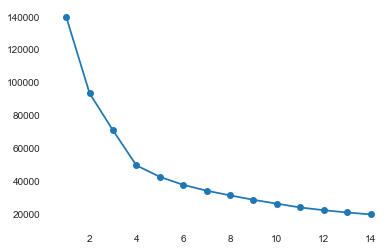

In [92]:
plt.plot(clusters_df.cluster_range,clusters_df.cluster_error,marker='o')
plt.show()

### now, by only looking at the graph, we can't deduce the approx no. of clusters required.
 - so we use SILHOUETTE Score

#### Silhouette score

In [93]:
from sklearn.metrics import silhouette_score

In [94]:
k_range=range(2,7)#will go till 6
score=[]
for k in k_range:
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(reduced_credit)
    score.append(silhouette_score(reduced_credit,km.labels_))

In [95]:
score

[0.33146791640963086,
 0.35296387300101834,
 0.4354157827369601,
 0.42956138138083505,
 0.42218716034419734]

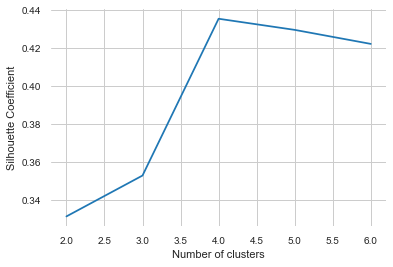

In [96]:
# plot the results
plt.plot(k_range, score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Above line graph shows, the optimum value of K is 4

In [97]:
km_4=KMeans(n_clusters=4,random_state=123)
km_4.fit(reduced_credit)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [98]:
km_4.labels_

array([1, 2, 3, ..., 1, 2, 3])

In [99]:
# To see the centroids of each cluster for each PC (total 8 PC)
km_4.cluster_centers_

array([[ 2.47147882,  1.25489848, -0.49565585,  0.5325893 , -0.55723781,
         0.31520514],
       [ 1.01933151, -2.38177401, -0.87493452, -0.45835886,  0.65133163,
        -0.11384414],
       [-3.87062354, -0.02167411, -0.47499485,  0.61756776, -0.63599659,
        -0.22019   ],
       [-0.54876187,  0.99933795,  2.3046091 , -0.93277998,  0.76033882,
        -0.08531644]])

In [100]:
pd.Series(km_4.labels_).value_counts()

0    2769
1    2224
2    2088
3    1869
dtype: int64

In [101]:
#calculating % of obervations in each cluster
((pd.Series(km_4.labels_).value_counts()/len(km_4.labels_))*100)

0    30.938547
1    24.849162
2    23.329609
3    20.882682
dtype: float64

In [102]:
credit_dummy

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,purchase_type_both purchases,purchase_type_installment,purchase_type_no purchase,purchase_type_oneoff_purchase
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0.693147,0.000000,5.677165,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.902377,0.000000,0.028095,2.036042,0,1,0,0
8946,0.693147,0.000000,5.707110,0.693147,0.000000,0.606136,0.000000,0.000000,1.945910,3.931826,0.000000,0.019002,0.307132,0,1,0,0
8947,0.606136,0.000000,4.979489,0.606136,0.000000,0.510826,0.000000,0.000000,1.791759,3.221539,0.000000,0.023129,0.686161,0,1,0,0
8948,0.606136,0.000000,0.000000,0.000000,0.000000,0.000000,0.154151,1.098612,0.000000,0.000000,1.959127,0.026559,0.663978,0,0,1,0


### Now we pick useful variables(which makes more sense from business perspective) for interpretation

In [103]:
col=['purchase_type_both purchases','purchase_type_installment','purchase_type_no purchase','purchase_type_oneoff_purchase',
    'Monthly_cash_advance','limit_usage','payment_minpay_ratio','Monthly_average_purchase','CASH_ADVANCE_TRX']

In [104]:
credit_updated.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance', 'limit_usage', 'payment_minpay_ratio',
       'purchase_type'],
      dtype='object')

In [105]:
cluster_df=pd.concat([credit_dummy[col],pd.Series(km_4.labels_,name='Cluster_membership')],axis=1)

In [106]:
cluster_df.head()

,purchase_type_both purchases,purchase_type_installment,purchase_type_no purchase,purchase_type_oneoff_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,Monthly_average_purchase,CASH_ADVANCE_TRX,Cluster_membership
0,0,1,0,0,0.000000,0.040086,0.894662,2.191654,0.000000,1
1,0,0,1,0,6.287695,0.376719,1.574068,0.000000,1.609438,2
2,0,0,0,1,0.000000,0.287197,0.688979,4.180994,0.000000,3
3,0,0,0,1,2.898616,0.200671,0.000000,4.835620,0.693147,3
4,0,0,0,1,0.000000,0.519644,1.327360,0.847298,0.000000,3


In [107]:
#Now adding Cust_id to see which member/observation belongs to which Cluster
cluster_df=pd.concat([credit_new.CUST_ID,cluster_df],axis=1)

In [108]:
cluster_df.head()

,CUST_ID,purchase_type_both purchases,purchase_type_installment,purchase_type_no purchase,purchase_type_oneoff_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,Monthly_average_purchase,CASH_ADVANCE_TRX,Cluster_membership
0,C10001,0,1,0,0,0.000000,0.040086,0.894662,2.191654,0.000000,1
1,C10002,0,0,1,0,6.287695,0.376719,1.574068,0.000000,1.609438,2
2,C10003,0,0,0,1,0.000000,0.287197,0.688979,4.180994,0.000000,3
3,C10004,0,0,0,1,2.898616,0.200671,0.000000,4.835620,0.693147,3
4,C10005,0,0,0,1,0.000000,0.519644,1.327360,0.847298,0.000000,3


In [109]:
# Percentage of each cluster in the total customer base
s=cluster_df.groupby('Cluster_membership').apply(lambda x: x['Cluster_membership'].value_counts())
print( s,'\n')

per=pd.Series((s.values.astype('float')/ cluster_df.shape[0])*100,name='Percentage')
print ("Clusters ",'\n')
print (pd.concat([pd.Series(s.values,name='Size'),per],axis=1),'\n')


Cluster_membership   
0                   0    2769
1                   1    2224
2                   2    2088
3                   3    1869
Name: Cluster_membership, dtype: int64 

Clusters  

   Size  Percentage
0  2769   30.938547
1  2224   24.849162
2  2088   23.329609
3  1869   20.882682 



## now finding mean of each column for each cluster

In [110]:
cluster_4=cluster_df.groupby('Cluster_membership')\
.apply(lambda x:x[col].mean()).T

In [111]:
cluster_4

Cluster_membership,0,1,2,3
purchase_type_both purchases,1.000000,0.000000,0.001916,0.000535
purchase_type_installment,0.000000,1.000000,0.017241,0.000000
purchase_type_no purchase,0.000000,0.000000,0.977969,0.000000
purchase_type_oneoff_purchase,0.000000,0.000000,0.002874,0.999465
Monthly_cash_advance,1.636466,0.856574,4.490196,1.902413
limit_usage,0.275972,0.198447,0.426474,0.289708
payment_minpay_ratio,1.625599,1.225984,1.120397,1.309126
Monthly_average_purchase,4.769610,3.384036,0.036859,3.475249
CASH_ADVANCE_TRX,0.645340,0.295171,1.662185,0.732649


#### clusters 0 and 3 both have almost similar payment_minpay_ratio, limit usage, and casj_advance_txn

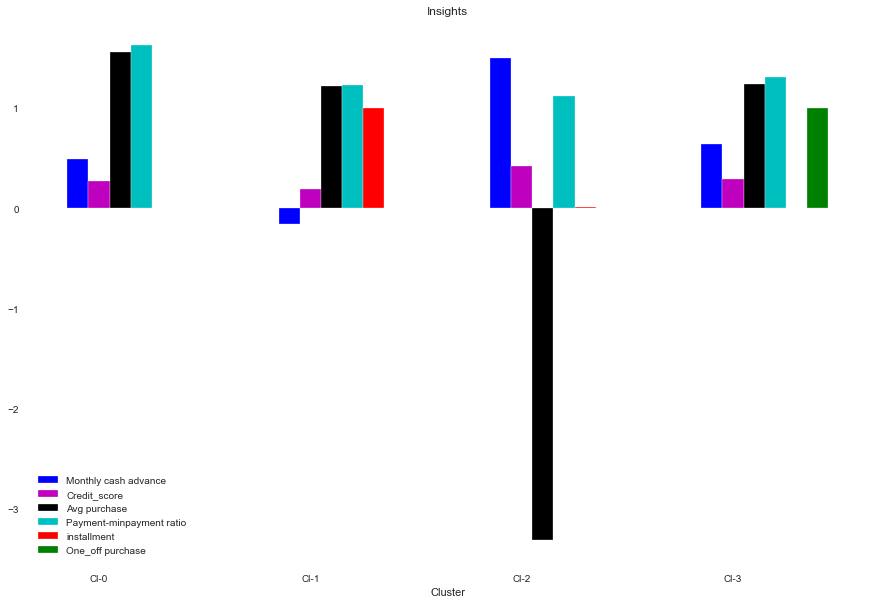

In [113]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_average_purchase',:].values)
payment=cluster_4.loc['payment_minpay_ratio',:].values
installment=cluster_4.loc['purchase_type_installment',:].values
one_off=cluster_4.loc['purchase_type_oneoff_purchase',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3'))
plt.legend()
plt.show()


## cluster 0 
- *** This group is about 31% of the total customer base ***
- these people have second lowest Monthly cash advance , these people never did One off purchases at all , their credit score is decent , they have highest Avg purchase , they have highest payment-minpaymnet ratio, they never took installment/EMI's

## cluster 1 
- *** This group is about 25% of the total customer base ***
- these people have lowest Monthly cash advance , these people never did One off purchases , their credit score is lowest , they have second highest Avg purchase , they have second lowest payment-minpaymnet ratio, they took max installment/EMI's

## cluster 2 
- *** This group is about 23% of the total customer base ***
- these people have highest Monthly cash advance , these people never do one off purchases , their credit score is highest , they have lowest Avg purchase , they have lowest payment-minpaymnet ratio, they have lowest installment/EMI's

## cluster 3 
- *** This group is about 21% of the total customer base ***
- these people have second highest Monthly cash advance , these people have highest One off purchases , their credit score is second highest , they have the 2nd highest Avg purchase , they have 2nd highest payment-minpaymnet ratio, they never took installment/EMI's


In [114]:
from sklearn.metrics import calinski_harabaz_score,silhouette_score



In [115]:
score={}
score_c={}
for n in range(3,10):
    km_score=KMeans(n_clusters=n)
    km_score.fit(reduced_credit)
    score_c[n]=calinski_harabaz_score(reduced_credit,km_score.labels_)
    score[n]=silhouette_score(reduced_credit,km_score.labels_)

C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\d

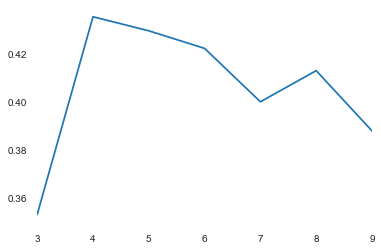

In [116]:
#for silhouette score
pd.Series(score).plot()

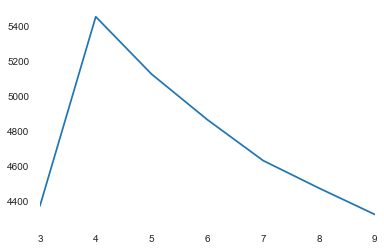

In [117]:
# for calinski harabaz score
pd.Series(score_c).plot()

## Finding behaviour with 5 clusters

In [118]:
km_5=KMeans(n_clusters=5,random_state=123)
km_5=km_5.fit(reduced_credit)
km_5.labels_

array([3, 2, 0, ..., 3, 2, 0])

In [119]:
pd.Series(km_5.labels_).value_counts()

3    2147
2    2083
1    1968
0    1869
4     883
dtype: int64

In [120]:
reduced_credit[:,1]

array([-2.7715583 ,  0.15982632,  1.50329388, ..., -2.8152237 ,
       -1.0180216 ,  2.22157155])

In [121]:
cluster_df_5=pd.concat([credit_dummy[col],pd.Series(km_5.labels_,name='Cluster_membership_5')],axis=1)

In [122]:
cluster_df_5.head()

,purchase_type_both purchases,purchase_type_installment,purchase_type_no purchase,purchase_type_oneoff_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,Monthly_average_purchase,CASH_ADVANCE_TRX,Cluster_membership_5
0,0,1,0,0,0.000000,0.040086,0.894662,2.191654,0.000000,3
1,0,0,1,0,6.287695,0.376719,1.574068,0.000000,1.609438,2
2,0,0,0,1,0.000000,0.287197,0.688979,4.180994,0.000000,0
3,0,0,0,1,2.898616,0.200671,0.000000,4.835620,0.693147,0
4,0,0,0,1,0.000000,0.519644,1.327360,0.847298,0.000000,0


In [123]:

#Now adding Cust_id to see which member/observation belongs to which Cluster
cluster_df_5=pd.concat([credit.CUST_ID,cluster_df_5],axis=1)

In [124]:
# Finding Mean of features for each cluster
cluster_5=cluster_df_5.groupby('Cluster_membership_5')\
.apply(lambda x: x[col].mean()).T

In [125]:
cluster_5

Cluster_membership_5,0,1,2,3,4
purchase_type_both purchases,0.002140,1.000000,0.000000,0.000000,0.908267
purchase_type_installment,0.000000,0.000000,0.016803,1.000000,0.088335
purchase_type_no purchase,0.000000,0.000000,0.980317,0.000000,0.000000
purchase_type_oneoff_purchase,0.997860,0.000000,0.002880,0.000000,0.003398
Monthly_cash_advance,1.895638,0.336381,4.485862,0.684011,4.926348
limit_usage,0.289200,0.206353,0.426463,0.187415,0.453154
payment_minpay_ratio,1.307215,1.806776,1.120820,1.231029,1.174869
Monthly_average_purchase,3.471559,4.848376,0.029620,3.373540,4.496838
CASH_ADVANCE_TRX,0.728268,0.089468,1.656949,0.213886,2.078741


#### cluster 2 and 4 have almost similar monthly cash advance , almost same limit usage, similar payment_minpayment ratio, so they are not distinguishable

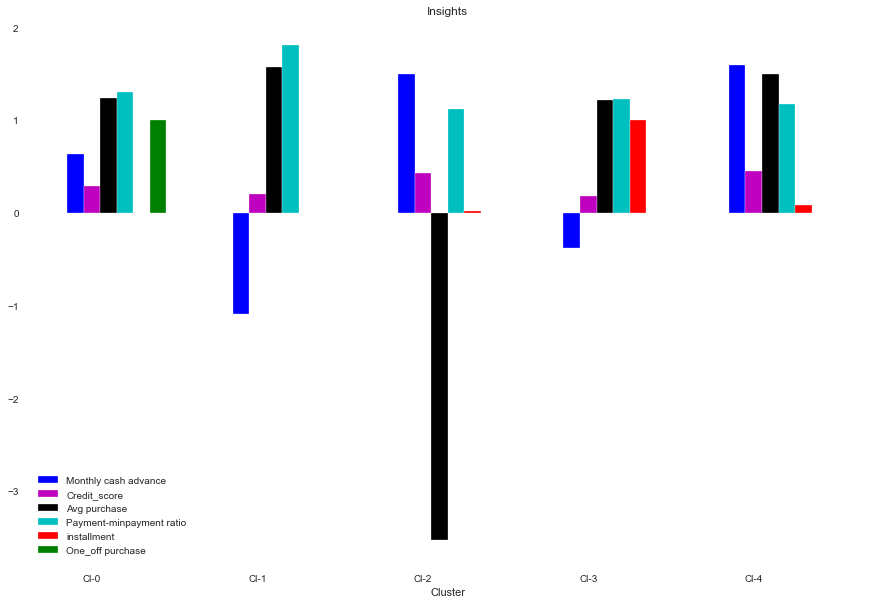

In [126]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_5.columns))

cash_advance=np.log(cluster_5.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_5.loc['limit_usage',:].values)
purchase= np.log(cluster_5.loc['Monthly_average_purchase',:].values)
payment=cluster_5.loc['payment_minpay_ratio',:].values
installment=cluster_5.loc['purchase_type_installment',:].values
one_off=cluster_5.loc['purchase_type_oneoff_purchase',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4'))
plt.legend()

## trying with 6 clusters

In [127]:
km_6=KMeans(n_clusters=6,random_state=123)
km_6.fit(reduced_credit)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [128]:
km_6.labels_


array([0, 3, 1, ..., 0, 3, 4])

In [129]:
pd.Series(km_6.labels_).value_counts()


0    2147
3    2077
2    1964
1    1183
5     880
4     699
dtype: int64

In [130]:
#calculating % of obervations in each cluster
((pd.Series(km_6.labels_).value_counts()/len(km_6.labels_))*100)

0    23.988827
3    23.206704
2    21.944134
1    13.217877
5     9.832402
4     7.810056
dtype: float64

In [131]:
cluster_df_6=pd.concat([credit_dummy[col],pd.Series(km_6.labels_,name='Cluster_membership_6')],axis=1)
cluster_df_6.head()

,purchase_type_both purchases,purchase_type_installment,purchase_type_no purchase,purchase_type_oneoff_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,Monthly_average_purchase,CASH_ADVANCE_TRX,Cluster_membership_6
0,0,1,0,0,0.000000,0.040086,0.894662,2.191654,0.000000,0
1,0,0,1,0,6.287695,0.376719,1.574068,0.000000,1.609438,3
2,0,0,0,1,0.000000,0.287197,0.688979,4.180994,0.000000,1
3,0,0,0,1,2.898616,0.200671,0.000000,4.835620,0.693147,1
4,0,0,0,1,0.000000,0.519644,1.327360,0.847298,0.000000,1


In [132]:
#No adding Cust_id to see which member/observation belongs to which Cluster
cluster_df_6=pd.concat([credit.CUST_ID,cluster_df_6],axis=1)
cluster_df_6.head()

,CUST_ID,purchase_type_both purchases,purchase_type_installment,purchase_type_no purchase,purchase_type_oneoff_purchase,Monthly_cash_advance,limit_usage,payment_minpay_ratio,Monthly_average_purchase,CASH_ADVANCE_TRX,Cluster_membership_6
0,C10001,0,1,0,0,0.000000,0.040086,0.894662,2.191654,0.000000,0
1,C10002,0,0,1,0,6.287695,0.376719,1.574068,0.000000,1.609438,3
2,C10003,0,0,0,1,0.000000,0.287197,0.688979,4.180994,0.000000,1
3,C10004,0,0,0,1,2.898616,0.200671,0.000000,4.835620,0.693147,1
4,C10005,0,0,0,1,0.000000,0.519644,1.327360,0.847298,0.000000,1


In [133]:
# Mean value gives good indication of the distribution of data. So we are finding mean value for each variable for each cluster
cluster_6=cluster_df_6.groupby('Cluster_membership_6')\
.apply(lambda x: x[col].mean()).T
cluster_6


Cluster_membership_6,0,1,2,3,4,5
purchase_type_both purchases,0.000000,0.006762,1.000000,0.000000,0.000000,0.911364
purchase_type_installment,1.000000,0.000000,0.000000,0.016851,0.000000,0.088636
purchase_type_no purchase,0.000000,0.000000,0.000000,0.983149,0.000000,0.000000
purchase_type_oneoff_purchase,0.000000,0.993238,0.000000,0.000000,1.000000,0.000000
Monthly_cash_advance,0.684011,0.277417,0.337066,4.482972,4.674609,4.920562
limit_usage,0.187415,0.190756,0.206762,0.426243,0.456736,0.453142
payment_minpay_ratio,1.231029,1.457033,1.808479,1.120383,1.051873,1.174065
Monthly_average_purchase,3.373540,3.596777,4.853798,0.028417,3.234191,4.494077
CASH_ADVANCE_TRX,0.213886,0.076399,0.089650,1.654637,1.853331,2.074486


#### clusters 1 and 2 both have almost similar monthly cash advance, limit usage, and cash_advance_txn  
#### clusters 4 and 5 both have almost similar cash advance, limit usage, and paymeny_minpayment ratio

In [134]:
cluster_6.columns

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64', name='Cluster_membership_6')

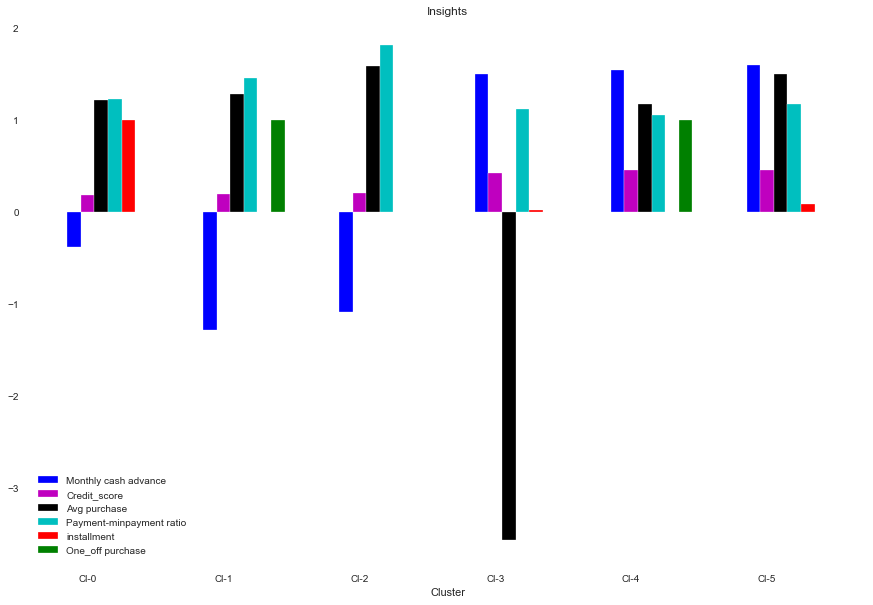

In [135]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_6.columns))

cash_advance=np.log(cluster_6.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_6.loc['limit_usage',:].values)
purchase= np.log(cluster_6.loc['Monthly_average_purchase',:].values)
payment=cluster_6.loc['payment_minpay_ratio',:].values
installment=cluster_6.loc['purchase_type_installment',:].values
one_off=cluster_6.loc['purchase_type_oneoff_purchase',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-0', 'Cl-1', 'Cl-2', 'Cl-3','Cl-4','Cl-5'))
plt.legend()
plt.show()

### 6 clusters does not make sense and are not interpretable as some of them are repeating the characterstics.